<a href="https://www.kaggle.com/code/gargivipat/crab-age-prediction-notebook?scriptVersionId=132342967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [2]:
import warnings
warnings.simplefilter(action='ignore',category= FutureWarning)

# Taking a Look at the Data

In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")

In [4]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [5]:
train_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
train_df.shape

(74051, 10)

In [7]:
train_df.set_index('id',inplace=True)

In [8]:
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,74051.0,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.0,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.0,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.0,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.0,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.0,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.0,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.0,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


In [11]:
train_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Sex', ylabel='count'>

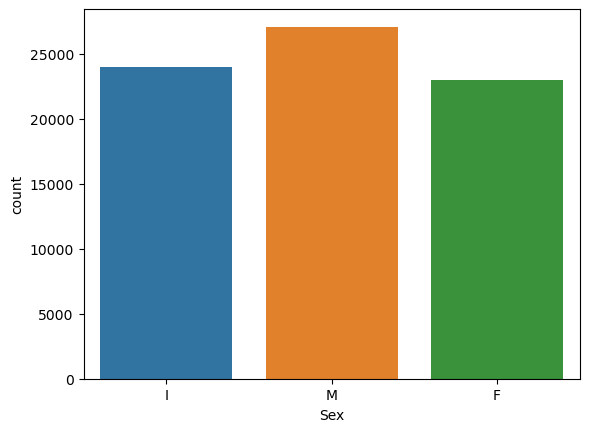

In [13]:
#Sex column
sns.countplot(data=train_df,x='Sex')

In [14]:
train_df['Age'].unique()

array([ 9,  8, 11, 10, 12,  7,  5, 14,  6, 13, 16,  4, 18, 15, 17,  3, 19,
       23, 21, 20, 26, 22, 27, 24, 25, 29,  2,  1])

In [15]:
len(train_df['Age'].unique())

28

<Axes: xlabel='Age', ylabel='count'>

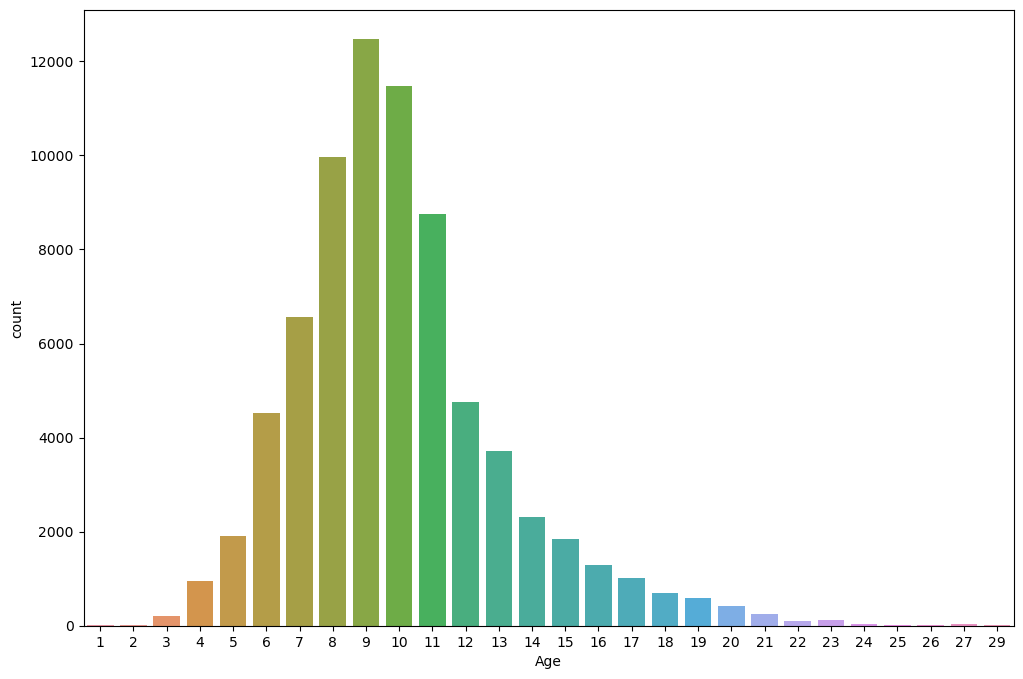

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_df,x='Age')

<Axes: >

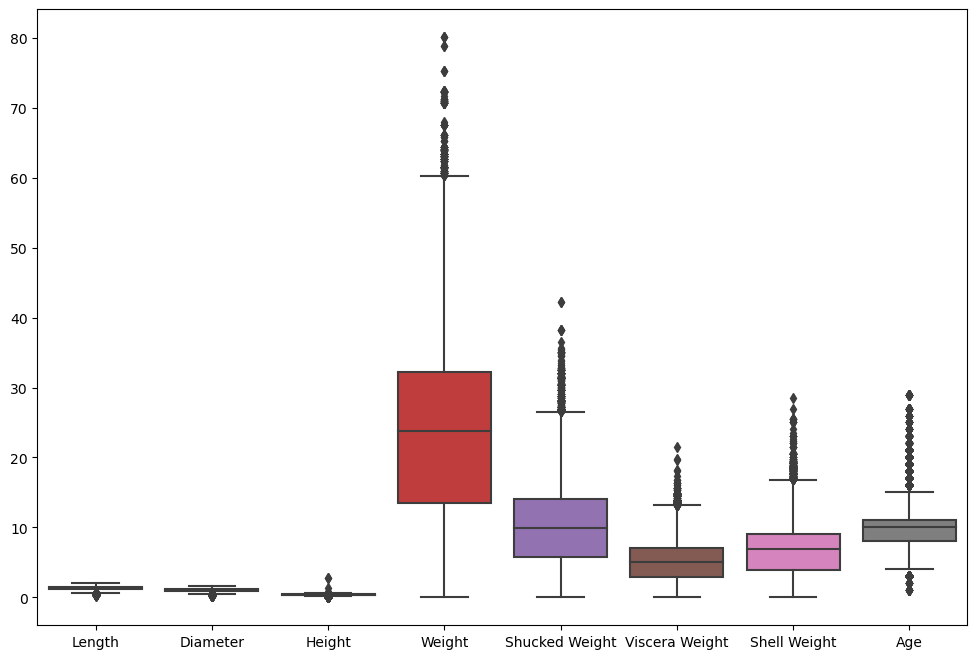

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df)

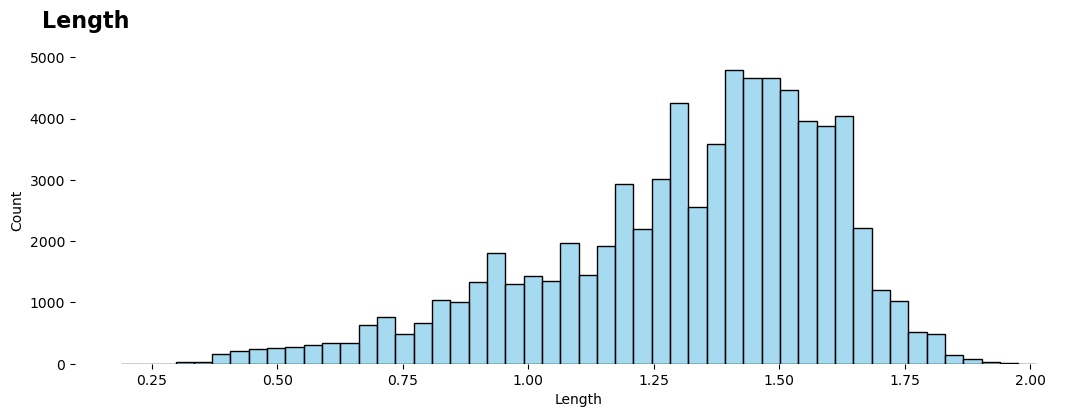

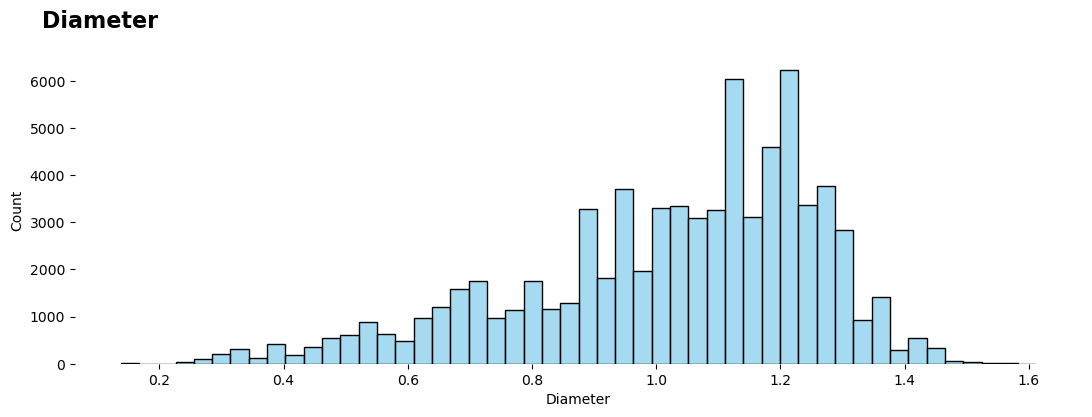

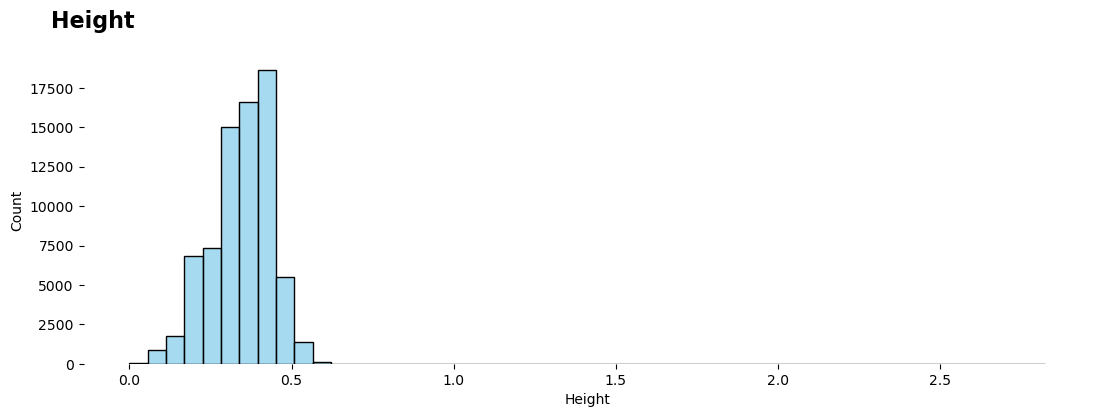

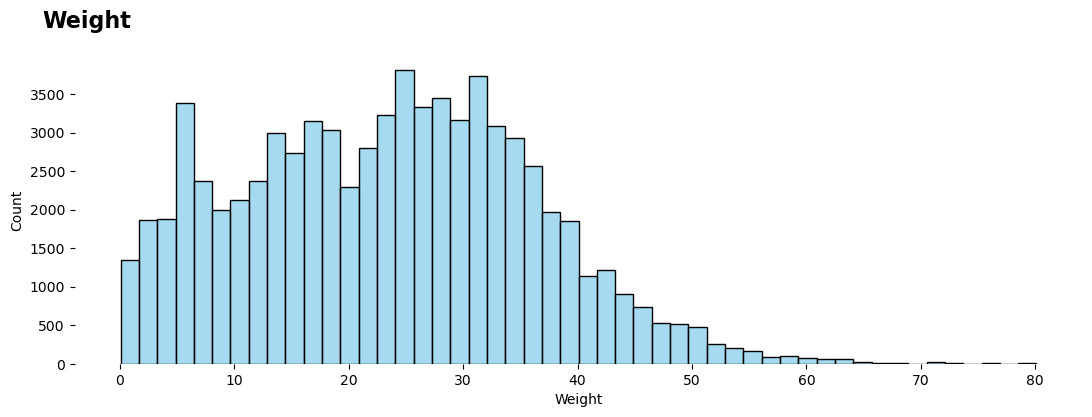

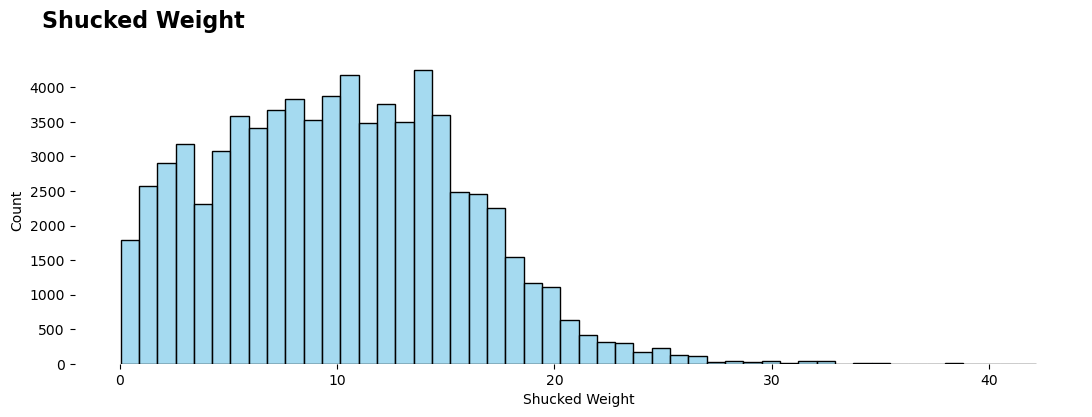

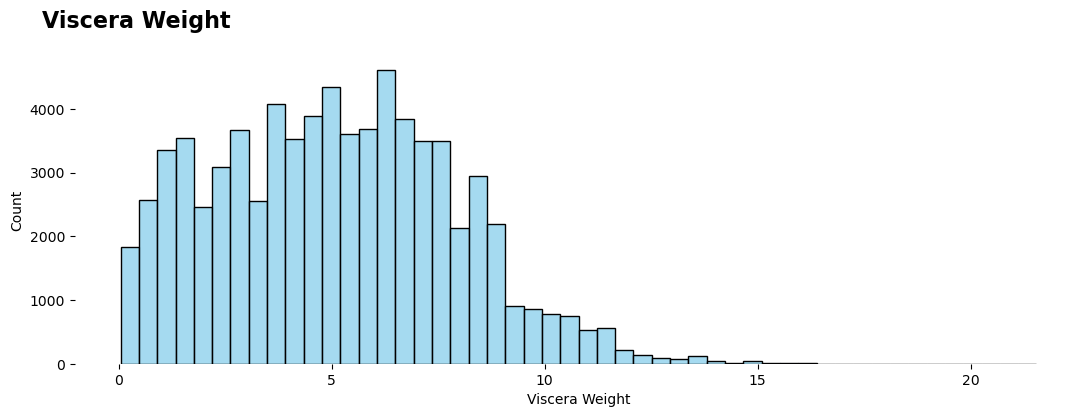

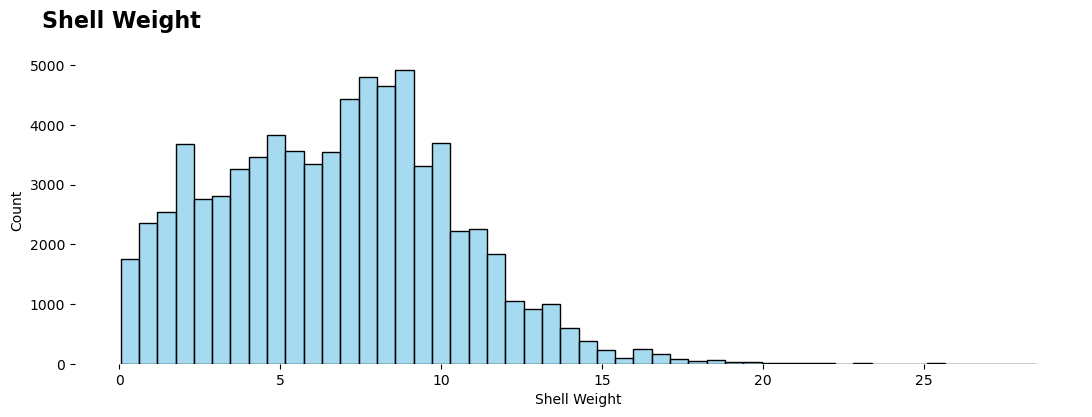

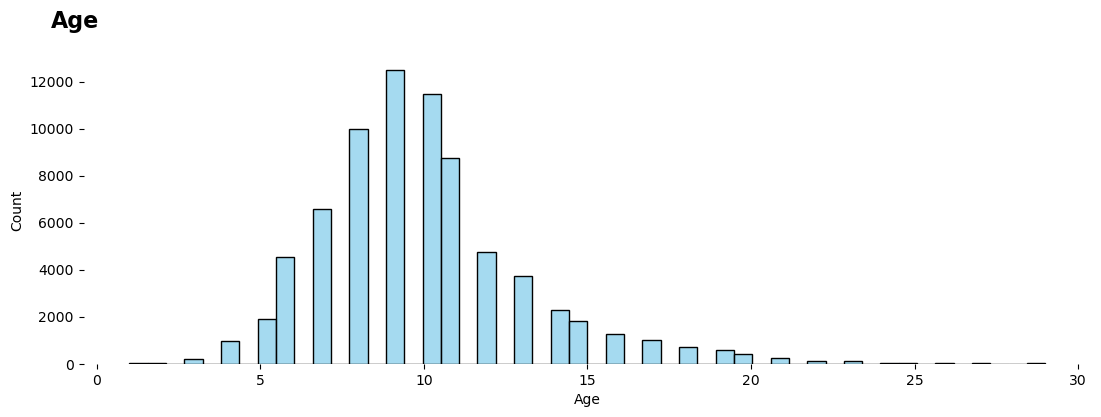

In [18]:
num = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Age']
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    sns.histplot(train_df[n],color='skyblue',bins=50)
    fig.text(x=0.1,y=0.95,s=f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.box(False)

## Bivariate Analysis 

**Finding correlation of various feature values with age**

In [19]:
train_df.corr()['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
Name: Age, dtype: float64

*All the feature values are positively correlated with the target variable i.e the Age*

<Axes: xlabel='Age', ylabel='count'>

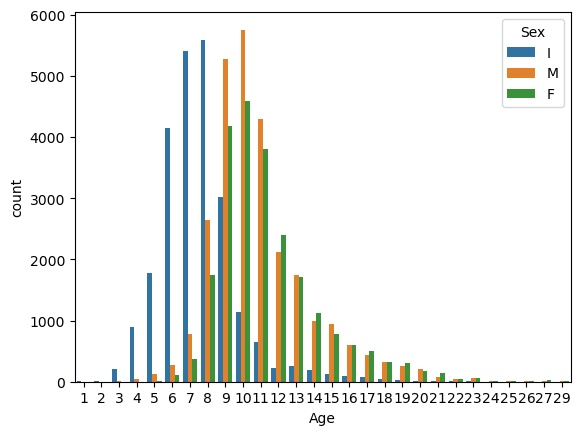

In [20]:
sns.countplot(data=train_df,x='Age',hue='Sex')

*As the age increases around 9 the male crabs start to increase and the indeterminate class starts to decrease, it makes sense as the number of male crabs is more than the other two*

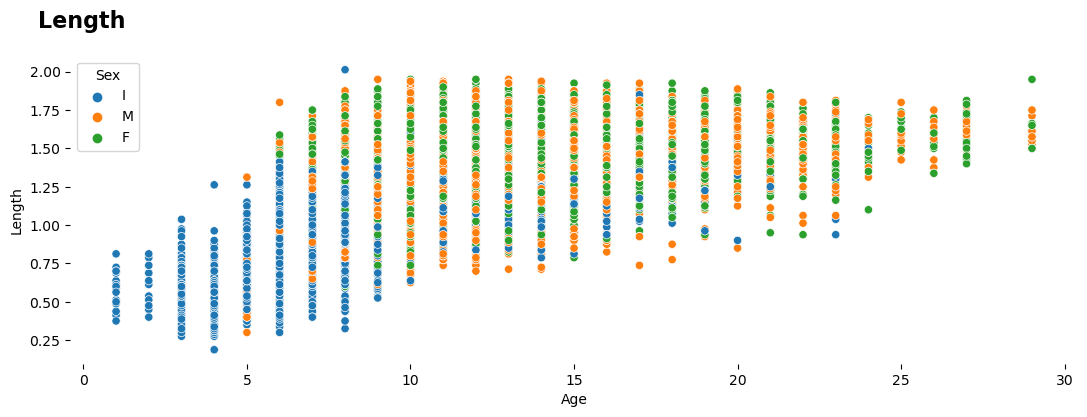

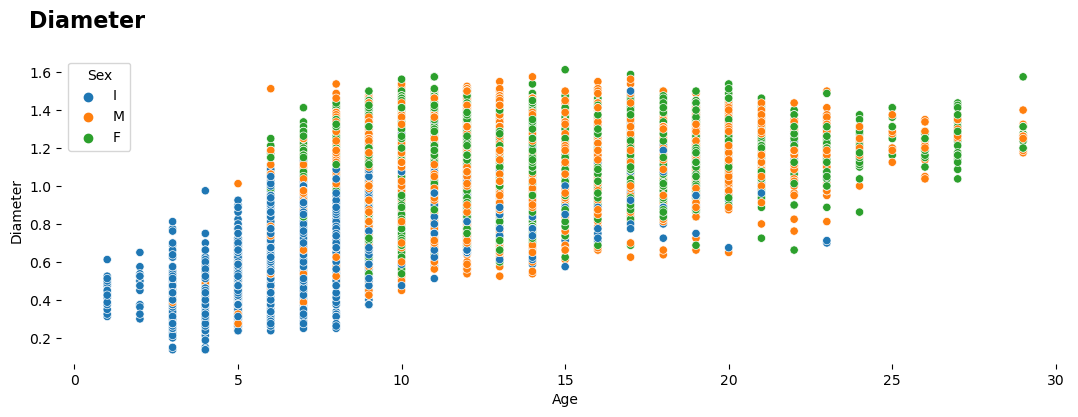

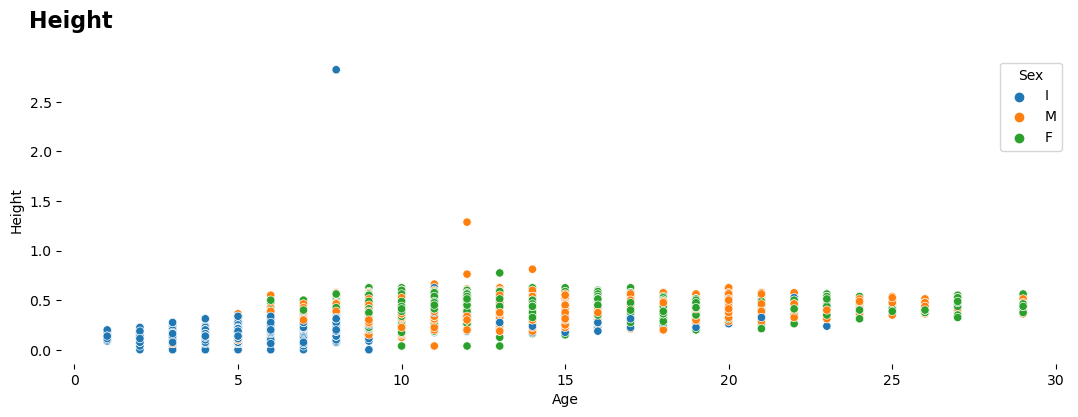

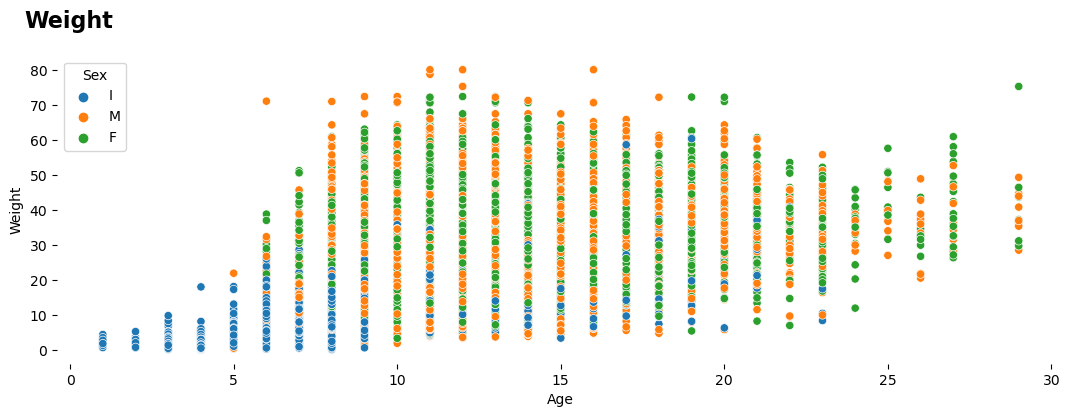

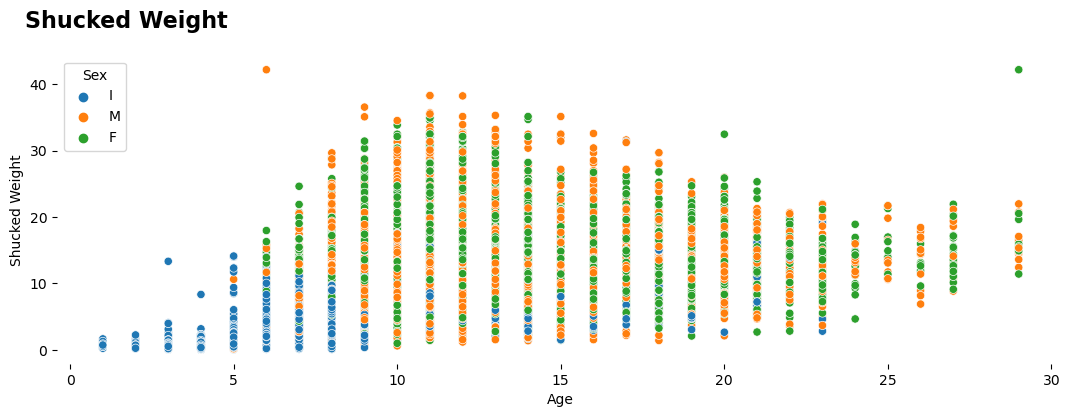

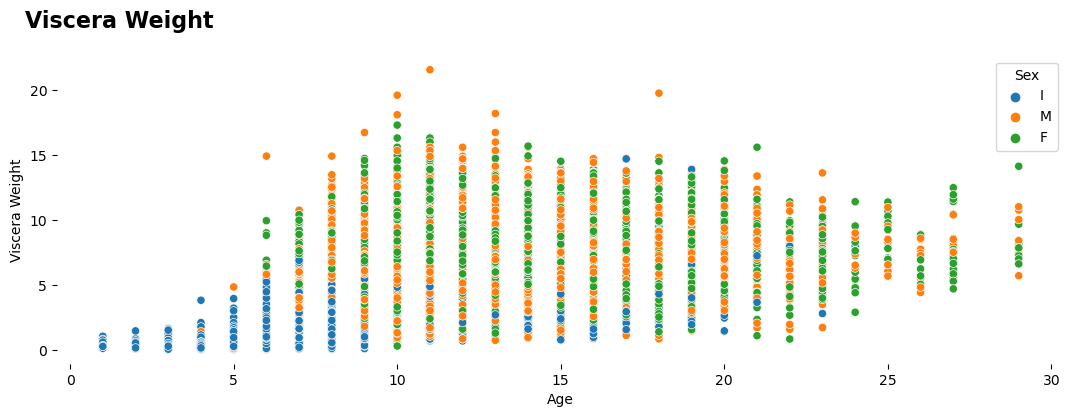

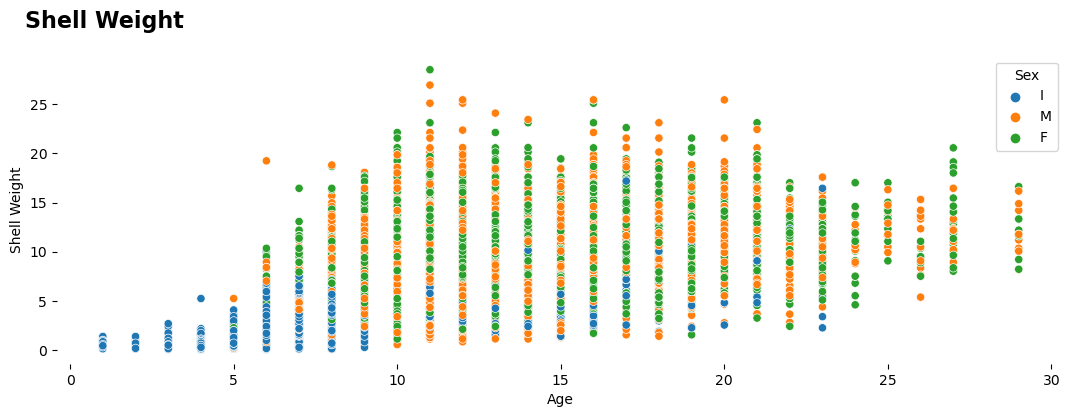

In [21]:
num = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    sns.scatterplot(train_df,x='Age',y=n,hue='Sex')
    fig.text(x=0.1,y=0.95,s=f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.box(False)

*As the crab gets older the weight of the crab decreases*

<Axes: >

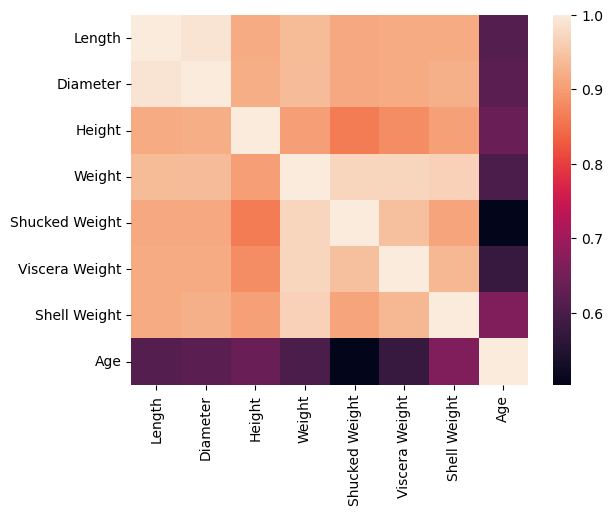

In [22]:
sns.heatmap(train_df.corr())

# Feature Engineering

In [23]:
train_df[train_df['Height']>=2.5]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
19023,F,1.2375,0.9500,2.825,16.839603,9.412034,3.288542,3.784658,8
55879,I,1.1375,0.8875,2.825,16.839603,9.412034,4.068153,3.784658,8


*As these are just 2 data fields where hieght>2.5 therefore this can be termed as an outlier and should be removed so as to avoid fitting the model to these points*

In [24]:
train_df = train_df[~(train_df['Height']>=2.5)]

In [25]:
train_df[train_df['Shell Weight']>26]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
10628,F,1.8125,1.4000,0.5250,60.696280,18.427175,11.283101,28.491248,11
50117,M,1.8500,1.4625,0.4875,55.239001,23.104843,11.382324,26.932025,11


In [26]:
train_df = train_df[~(train_df['Shell Weight']>26)]

In [27]:
train_df[train_df['Height']>1.0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
4704,M,1.7625,1.4125,1.2875,62.652395,31.397071,11.63747,14.514944,12


In [28]:
train_df = train_df[~(train_df['Height']>1.0)]

In [29]:
train_df[train_df['Shucked Weight']>=40]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
11208,F,1.95,1.5750,0.5375,75.324622,42.184056,14.132226,16.612807,29
36740,M,1.80,1.5125,0.5500,71.114721,42.184056,14.911837,19.235136,6


In [30]:
train_df = train_df[~(train_df['Shucked Weight']>=40)]

In [31]:
train_df[train_df['Viscera Weight']>=20]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
30453,M,1.9375,1.575,0.55,78.797435,38.229301,21.54562,16.386011,11


In [32]:
train_df = train_df[~(train_df['Viscera Weight']>=20)]

In [33]:
train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


***Outliers should be removed as they can deteriorate the performance of the model as it increases the chances of the model fitting to the nature of outliers rather than fitting to a general plot***

In [34]:
train_df['Sex'] = train_df['Sex'].replace(['M','F','I'],[0,1,2])
train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,1,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,2,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,1,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


In [35]:
train_df['Total Weight'] = train_df['Shell Weight'] + train_df['Viscera Weight'] + train_df['Shucked Weight']
train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Total Weight
id,,,,,,,,,,
0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,27.725811
1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,10.248344
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,23.558435
3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,46.343665
4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,22.438629
...,...,...,...,...,...,...,...,...,...,...
74046,1,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,43.374735
74047,2,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,10.163296
74048,1,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,27.924257


In [36]:
train_df['Difference Weight'] = abs(train_df['Weight'] - train_df['Total Weight'])
train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Total Weight,Difference Weight
id,,,,,,,,,,,
0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,27.725811,1.247378
1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,10.248344,0.170097
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,23.558435,1.219029
3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,46.343665,4.316891
4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,22.438629,0.850485
...,...,...,...,...,...,...,...,...,...,...,...
74046,1,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,43.374735,7.285821
74047,2,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,10.163296,0.283495
74048,1,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,27.924257,1.559223


In [37]:
train_df.corr()['Age'].sort_values(ascending=False)

Age                  1.000000
Shell Weight         0.663844
Height               0.645333
Diameter             0.621320
Length               0.612898
Weight               0.601312
Total Weight         0.582228
Viscera Weight       0.576970
Shucked Weight       0.503395
Difference Weight    0.481657
Sex                 -0.420151
Name: Age, dtype: float64

In [38]:
train_df['Difference percent'] = (train_df['Difference Weight']/train_df['Weight'])*100
train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Total Weight,Difference Weight,Difference percent
id,,,,,,,,,,,,
0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,27.725811,1.247378,4.305284
1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,10.248344,0.170097,1.632653
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,23.558435,1.219029,4.919908
3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,46.343665,4.316891,8.521208
4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,22.438629,0.850485,3.651857
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,1,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,43.374735,7.285821,14.381645
74047,2,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,10.163296,0.283495,2.713704
74048,1,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,27.924257,1.559223,5.288462


In [39]:
train_df.corr()['Age'].sort_values(ascending=False)

Age                   1.000000
Shell Weight          0.663844
Height                0.645333
Diameter              0.621320
Length                0.612898
Weight                0.601312
Total Weight          0.582228
Viscera Weight        0.576970
Shucked Weight        0.503395
Difference Weight     0.481657
Difference percent    0.018871
Sex                  -0.420151
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Difference Weight'>

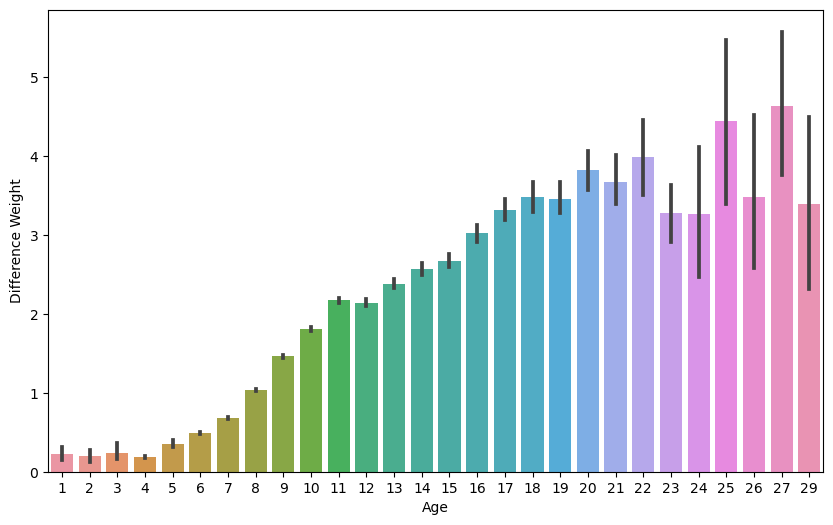

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df,x='Age',y='Difference Weight')

*Here, it is shown that as the crab is younger the difference in the weights is significantly small as compared to the difference in weights as the crab gets older, the difference peaks around 27 and decreases after that at around 29.*

<Axes: xlabel='Age', ylabel='Total Weight'>

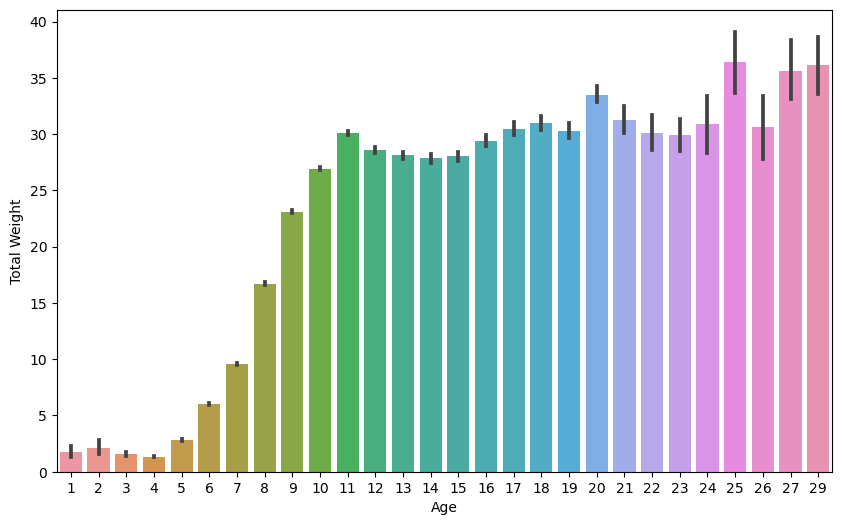

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df,x='Age',y='Total Weight')

In [42]:
train_df.drop(['Difference Weight','Difference percent'],axis=1,inplace=True)
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Total Weight
id,,,,,,,,,,
0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,27.725811
1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,10.248344
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,23.558435
3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,46.343665
4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,22.438629


# Model Training and Evaluation

In [43]:
X = train_df.drop('Age',axis=1).values
Y = train_df['Age'].values

In [44]:
X

array([[ 2.        ,  1.525     ,  1.175     , ...,  6.64795775,
         8.34892775, 27.725811  ],
       [ 2.        ,  1.1       ,  0.825     , ...,  2.324659  ,
         3.40194   , 10.24834425],
       [ 0.        ,  1.3875    ,  1.1125    , ...,  5.556502  ,
         6.6621325 , 23.5584345 ],
       ...,
       [ 1.        ,  1.4875    ,  1.2       , ...,  7.540967  ,
         8.0796075 , 27.9242575 ],
       [ 2.        ,  1.2125    ,  0.9625    , ...,  2.9199985 ,
         4.2807745 , 16.17338975],
       [ 2.        ,  0.9125    ,  0.675     , ...,  1.03475675,
         1.70097   ,  4.7910655 ]])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [46]:
submission = test_df.copy()
submission

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
49363,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


In [47]:
test_df.set_index('id',inplace = True)

In [48]:
test_df['Sex'] = test_df['Sex'].replace(['M','F','I'],[0,1,2])

In [49]:
test_df['Total Weight'] = test_df['Shell Weight'] + test_df['Viscera Weight'] + test_df['Shucked Weight']

In [50]:
test_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Total Weight
id,,,,,,,,,
74051,2,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,8.107957
74052,2,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,14.245624
74053,1,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,14.259799
74054,1,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,26.960375
74055,2,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,11.325625
...,...,...,...,...,...,...,...,...,...
123414,1,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,15.620575
123415,2,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,9.979024
123416,1,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,27.031248


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [52]:
x_test = scaler.transform(x_test)

In [53]:
X.shape

(74043, 9)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [55]:
model.fit(x=x_train,y=y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
1551/1551 [==============================] - 5s 3ms/step - loss: 17.8114 - val_loss: 6.0012
Epoch 2/400
1551/1551 [==============================] - 3s 2ms/step - loss: 5.7035 - val_loss: 5.4582
Epoch 3/400
1551/1551 [==============================] - 3s 2ms/step - loss: 5.2788 - val_loss: 5.1117
Epoch 4/400
1551/1551 [==============================] - 4s 2ms/step - loss: 4.9117 - val_loss: 4.7236
Epoch 5/400
1551/1551 [==============================] - 4s 2ms/step - loss: 4.6333 - val_loss: 4.5382
Epoch 6/400
1551/1551 [==============================] - 4s 2ms/step - loss: 4.5394 - val_loss: 4.5123
Epoch 7/400
1551/1551 [==============================] - 3s 2ms/step - loss: 4.5101 - val_loss: 4.5646
Epoch 8/400
1551/1551 [==============================] - 4s 2ms/step - loss: 4.5053 - val_loss: 4.4900
Epoch 9/400
1551/1551 [==============================] - 3s 2ms/step - loss: 4.4959 - val_loss: 4.4638
Epoch 10/400
1551/1551 [==============================] - 4s 2ms/step - 

In [56]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,17.811401,6.001170
1,5.703463,5.458223
2,5.278834,5.111680
3,4.911669,4.723576
4,4.633285,4.538221
...,...,...
395,4.241230,4.238196
396,4.242381,4.220789
397,4.243561,4.228061
398,4.240365,4.228332


<Axes: >

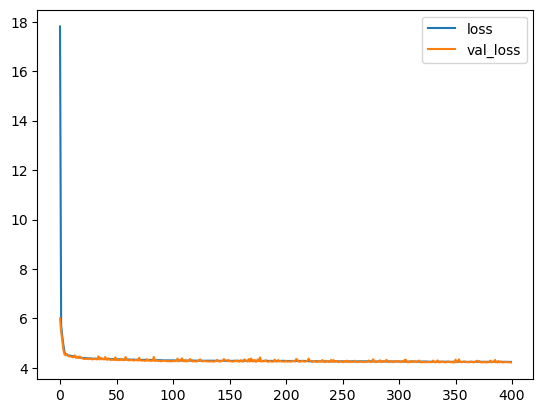

In [57]:
losses.plot()

In [58]:
y_pred = model.predict(x_test)
y_pred

764/764 [==============================] - 1s 1ms/step


array([[10.315622 ],
       [13.674212 ],
       [10.791723 ],
       ...,
       [10.108606 ],
       [12.214304 ],
       [ 9.5167055]], dtype=float32)

In [59]:
y_pred.shape

(24435, 1)

In [60]:
y_pred = y_pred.reshape(24435,)

In [61]:
y_test

array([ 9, 18, 12, ..., 10, 10, 11])

In [62]:
y_test = y_test.reshape(24435,)

In [63]:
y_test.shape

(24435,)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
mean_squared_error(y_test,y_pred)

4.216522720722913

In [65]:
mean_absolute_error(y_test,y_pred)

1.404781749464628

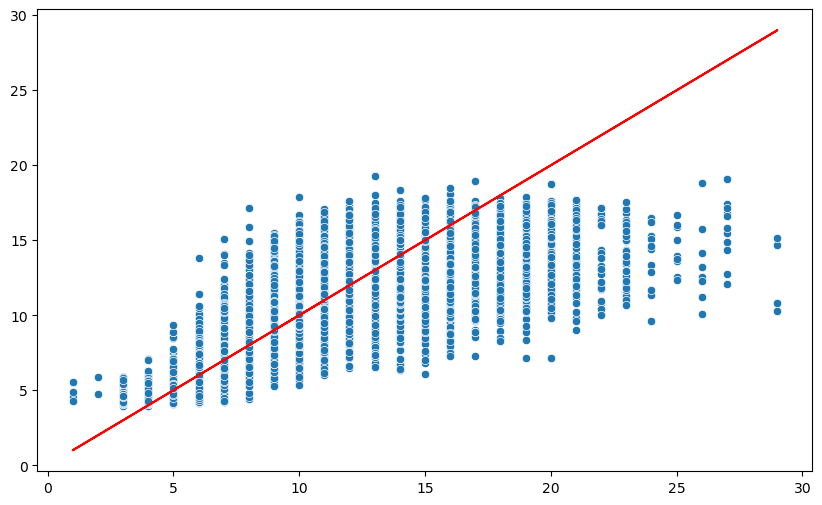

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot(y_test,y_test,'r')

In [67]:
test_df = scaler.transform(test_df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [68]:
predictions = model.predict(test_df)
predictions

1543/1543 [==============================] - 2s 1ms/step


array([[ 7.428268 ],
       [ 7.8513026],
       [10.496277 ],
       ...,
       [12.690567 ],
       [10.320342 ],
       [12.110337 ]], dtype=float32)

In [69]:
submission

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
49363,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


In [70]:
cols = list(submission.columns)
cols.pop(0)
cols

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight']

In [71]:
sub_1 = submission.drop(cols,axis=1)

In [72]:
sub_1['Age'] = predictions
sub_1

,id,Age
0,74051,7.428268
1,74052,7.851303
2,74053,10.496277
3,74054,9.500881
4,74055,7.467764
...,...,...
49363,123414,8.876375
49364,123415,7.739309
49365,123416,12.690567
49366,123417,10.320342
